# US Real GDP and its Composition by Industry
In this notebook I look at the Real GDP of the US and its composition by industry group. I look at the trends with respect to the Real GDP overall as well as in its consituent industries.

In [1]:
# Uncomment if running in Google Colaboratory, otherwise the import of the curves module in the cell below will fail
#!git clone -l -s https://github.com/ilchen/US_Economic_Data_Analysis.git cloned-repo
#%cd cloned-repo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import pandas_datareader.data as web
from datetime import date

In [3]:
report_start = date.fromisoformat('1969-01-01')
report_end = date.today()

In [4]:
real_gdp = web.get_data_fred('GDPC1', start=report_start, end=report_end)

# For real GDP I translate the growth over one quarter into annual rate to be consistent with
# how the BEA does it.
real_gdp_quarterly = ((real_gdp/real_gdp.shift(1)).pow(4)-1)

# If instead you want to calculate GDP growth over the whole year, the correct way to do that is
real_gdp = real_gdp.rolling(4).mean().pct_change(4, fill_method=None)

# Rename and add a quarterly growth rate expressed as annual growth
real_gdp.rename(columns={'GDPC1': 'Real GDP'}, inplace=True)
real_gdp['Real GDP over quarter at annual rate'] = real_gdp_quarterly
real_gdp.dropna(inplace=True)

For GDP I calculate both the growth over the last 4 quarters as well as growth over one quarter, both expressed as annual percentage rates.

In [5]:
import seaborn as sns
cm = sns.color_palette('Blues', as_cmap=True)
IDX_FORMAT = '{:%Y-%m}'

In [6]:
real_gdp.tail(18).style.format_index(IDX_FORMAT).format('{:.2%}')\
    .set_properties(subset=real_gdp.columns, **{'width': '200px'})\
    .set_table_styles([{'selector': 'th', 'props': 'text-align: right; width: 100px'}])\
    .background_gradient(cmap=cm)

,Real GDP,Real GDP over quarter at annual rate
DATE,,
2020-04,-0.04%,-28.08%
2020-07,-1.09%,35.20%
2020-10,-2.16%,4.41%
2021-01,-2.03%,5.64%
2021-04,2.68%,6.43%
2021-07,4.31%,3.46%
2021-10,6.06%,7.41%
2022-01,6.62%,-1.03%
2022-04,4.28%,0.28%


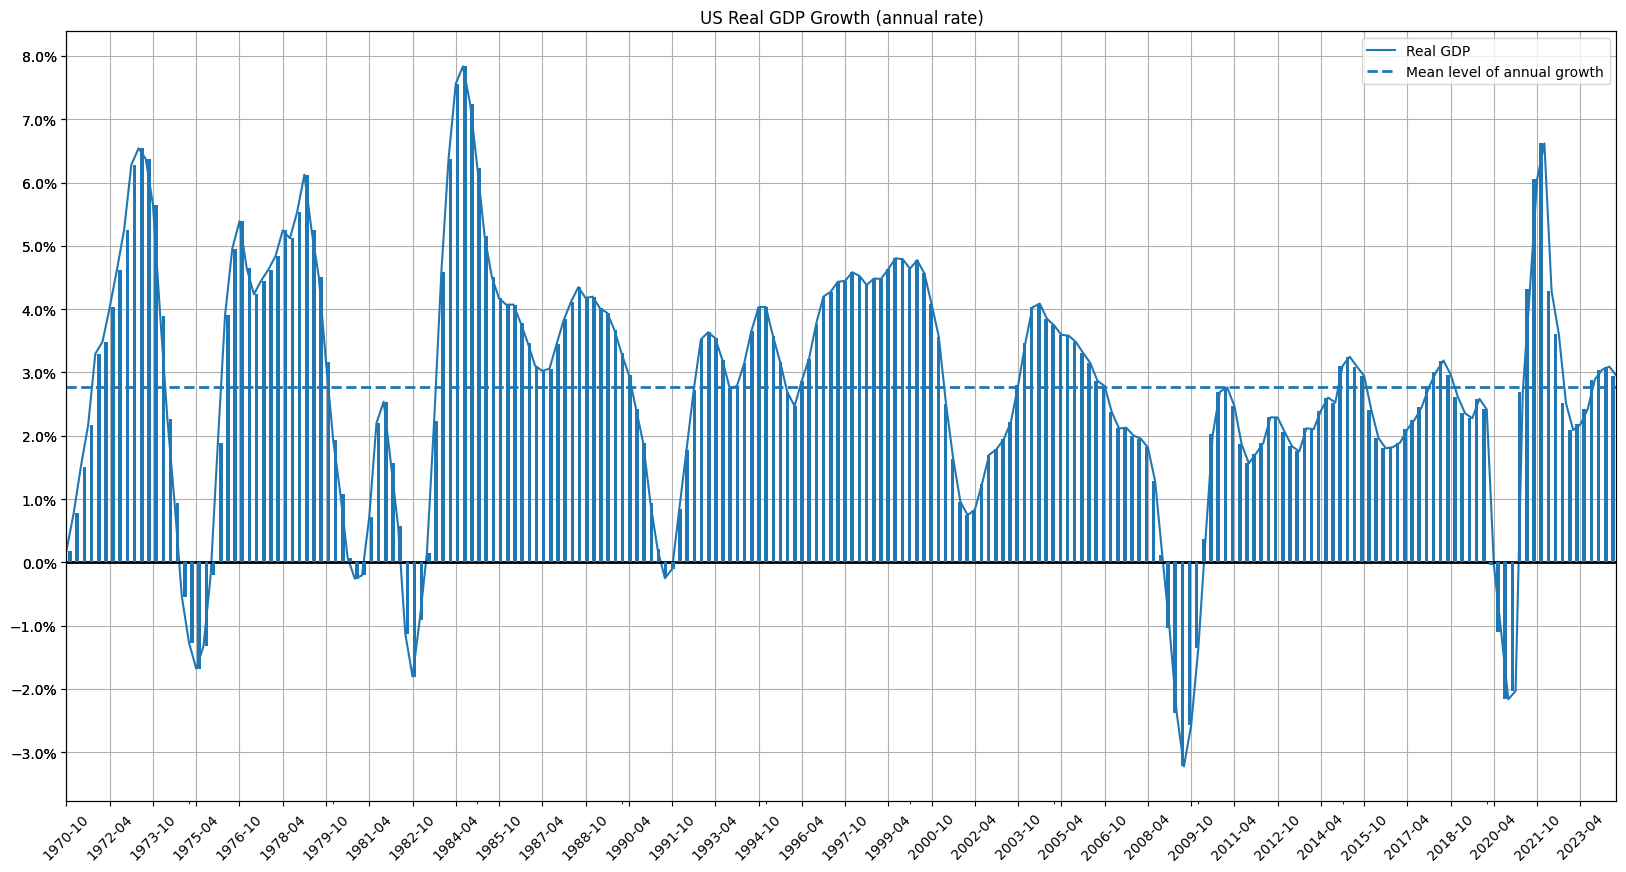

In [7]:
ax = real_gdp.iloc[:,0].plot(figsize=(20,10), grid=True, title='US Real GDP Growth (annual rate)',
                   xticks=real_gdp.index[::6], xlabel='', rot=45, yticks=np.arange(-.03, .081, 0.01))
ax.axhline(y=0, lw=2, c='k')
ax.axhline(y=real_gdp.iloc[:,0].mean(), lw=2, ls='--', c='#1f77b4', label='Mean level of annual growth')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2 = ax.twiny()
real_gdp.iloc[:,0].plot.bar(ax=ax2, xlabel='', legend=False)
ax2.xaxis.set_major_locator(mtick.NullLocator())
ax.legend()
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, real_gdp.index[::6])))

In [8]:
print(f'Mean level of real GDP growth rate since {real_gdp.index[0]:%Y-%m-%d}: {real_gdp.iloc[:,0].mean():.2%}')

Mean level of real GDP growth rate since 1970-10-01: 2.76%


## Composition of US GDP
In this section of the notebook I look at the real value added (represents the sum of the costs-incurred and the incomes-earned in production, and consists of compensation of employees, taxes on production and imports, less subsidies, and gross operating surplus) for each constituent industry of US GDP and how it changed over the past 5 and 6 years.

Recently U.S. Bureau of Economic Analysis revised Real GDP data for past years and switched from measuring it in Billions of Chained 2012 Dollars to 2017 Dollars. As a result the earliest possible quarter available for analysis is Q1 2018, which shortens the maximum possible analysis to 6 years in the past max.

In [9]:
gdp_components = web.get_data_fred(['RVAAFH', 'RVAM', 'RVAU', 'RVAC', 'RVAMA', 'RVAW', 'RVAR', 'RVAT',
                                    'RVAI', 'RVAFI', 'RVARL', 'RVAPBS', 'RVAES', 'RVAHCSA', 'RVAAERAF',
                                    'RVAOSEG', 'RVAG', 'RVAAI'], start=report_start, end=report_end)

In [10]:
GDP_AFH_COLUMN_NAME = 'Agriculture, Forestry, Fishing, and Hunting'
GDP_M_COLUMN_NAME = 'Mining'
GDP_U_COLUMN_NAME = 'Utilities'
GDP_C_COLUMN_NAME = 'Construction'
GDP_MA_COLUMN_NAME = 'Manufacturing'
GDP_W_COLUMN_NAME = 'Wholesale Trade'
GDP_R_COLUMN_NAME = 'Retail Trade'
GDP_T_COLUMN_NAME = 'Transportation and Warehousing'
GDP_I_COLUMN_NAME = 'Information'
GDP_FI_COLUMN_NAME = 'Finance and Insurance'
GDP_RL_COLUMN_NAME = 'Real Estate, Rental, and Leasing'
GDP_PBS_COLUMN_NAME = 'Professional and Business Services'
GDP_ES_COLUMN_NAME = 'Educational Services'
GDP_HCSA_COLUMN_NAME = 'Health Care and Social Assistance'
GDP_AERAF_COLUMN_NAME = 'Arts, Entert., Recreat., Accom., and Food Services'
GDP_OSEG_COLUMN_NAME = 'Other Services'
GDP_G_COLUMN_NAME = 'Government'
GRAPH_TITLE_GDP_COMPONENTS = 'Composition of US GDP By Value Added'
GRAPH_TITLE_GDP_COMPONENTS_PCT_CHG = 'Percentage Change in Value Added by Each Component of US GDP'
gdp_components.rename(
    columns={'RVAAFH': GDP_AFH_COLUMN_NAME, 'RVAM': GDP_M_COLUMN_NAME,
             'RVAU': GDP_U_COLUMN_NAME, 'RVAC': GDP_C_COLUMN_NAME,
             'RVAMA': GDP_MA_COLUMN_NAME, 'RVAW': GDP_W_COLUMN_NAME,
             'RVAR': GDP_R_COLUMN_NAME, 'RVAT': GDP_T_COLUMN_NAME,
             'RVAI': GDP_I_COLUMN_NAME, 'RVAFI': GDP_FI_COLUMN_NAME,
             'RVARL': GDP_RL_COLUMN_NAME, 'RVAPBS': GDP_PBS_COLUMN_NAME,
             'RVAES': GDP_ES_COLUMN_NAME, 'RVAHCSA': GDP_HCSA_COLUMN_NAME,
             'RVAAERAF': GDP_AERAF_COLUMN_NAME,
             'RVAOSEG': GDP_OSEG_COLUMN_NAME, 'RVAG': GDP_G_COLUMN_NAME},
    inplace=True)

gdp_total = gdp_components.iloc[:,-1]
gdp_components = gdp_components.iloc[:,:-1]

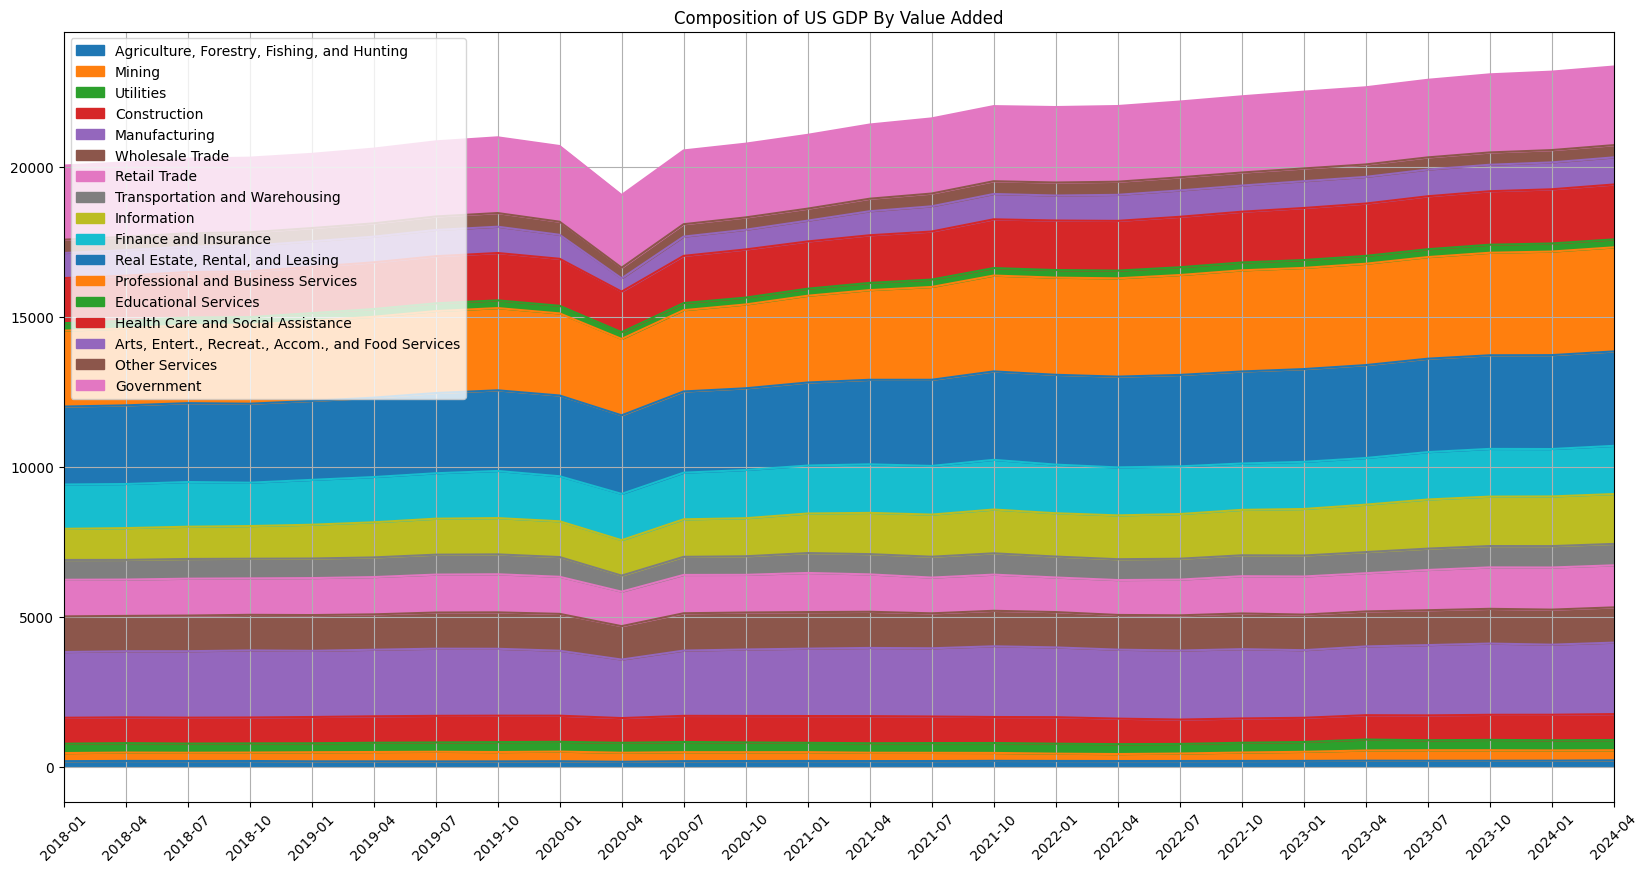

In [11]:
ax = gdp_components.plot.area(figsize=(20,10), grid=True, title=GRAPH_TITLE_GDP_COMPONENTS,
                              xticks=gdp_components.index, xlabel='', rot=45)
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, gdp_components.index)))

In [12]:
# Converting to percentages by dividing by total
gdp_components_pct = gdp_components.divide(gdp_total, axis=0)

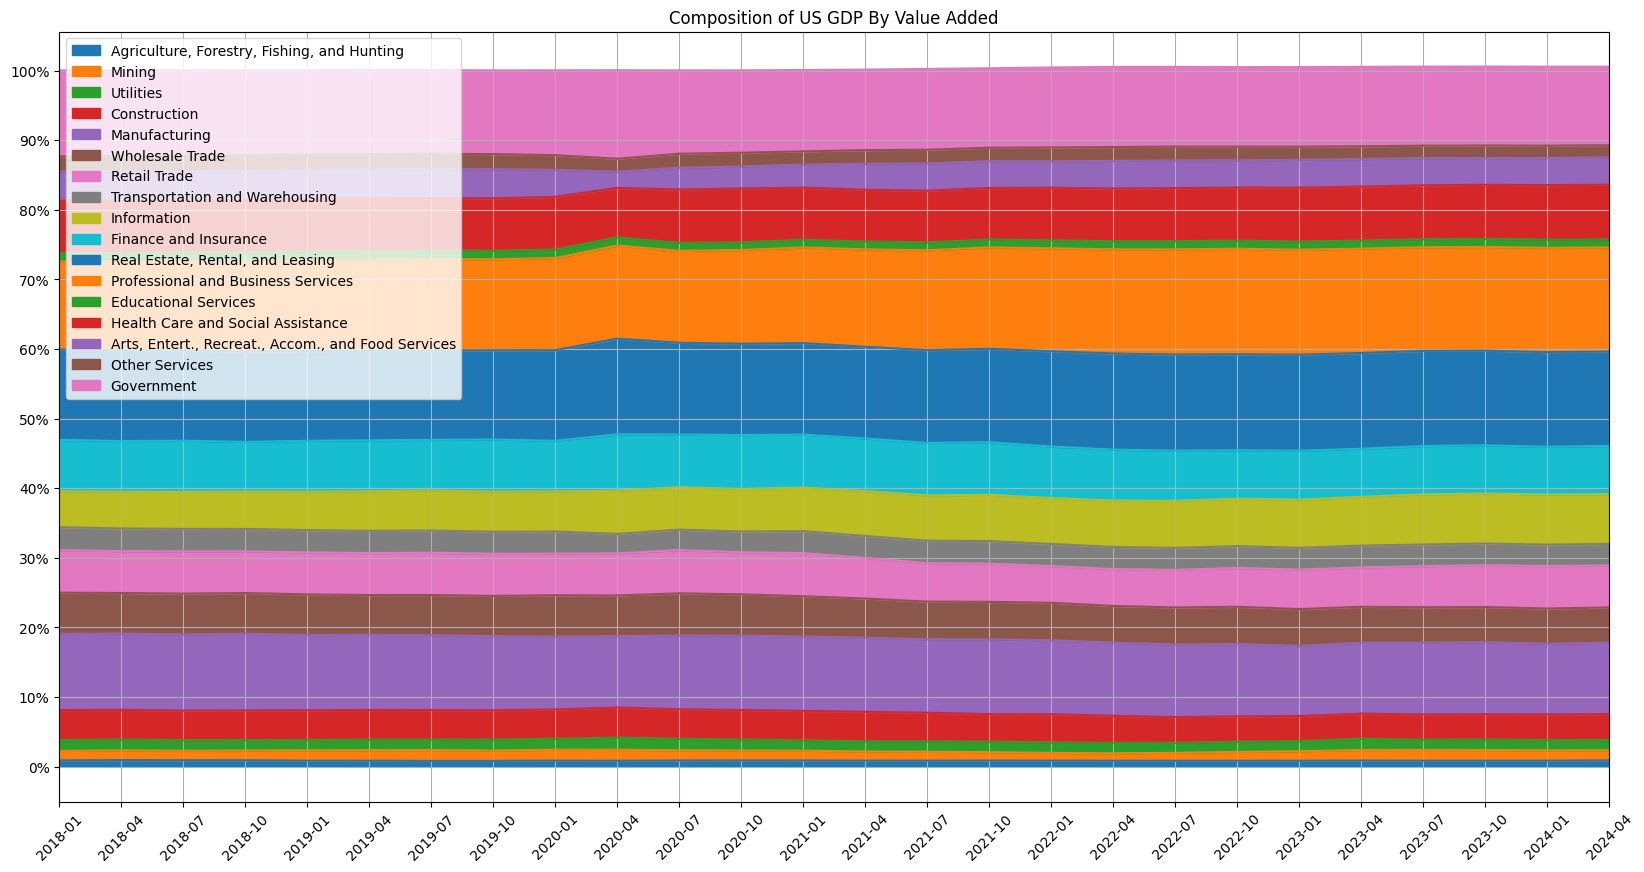

In [13]:
ax = gdp_components_pct.plot.area(figsize=(20,10), grid=True, title=GRAPH_TITLE_GDP_COMPONENTS,
                                  xticks=gdp_components_pct.index, xlabel='', rot=45,
                                  yticks=np.arange(0, 1.01, .1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.legend(loc='upper left')
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, gdp_components_pct.index)))

In [14]:
pd.options.display.float_format = '{:.2%}'.format
gdp_components_pct.iloc[-1,:].sort_values(ascending=False).head(5)

Professional and Business Services   14.95%
Real Estate, Rental, and Leasing     13.56%
Government                           11.29%
Manufacturing                        10.26%
Health Care and Social Assistance     7.89%
Name: 2024-04-01 00:00:00, dtype: float64

**Conclusion 1**: Professional and Business services, Real Estate, Rental and Leasing, Government, Manufecturing, and Healthcare industries contribute the most value added to US GDP as of the most recent quarter.

### Percentage Changes in Value Added by Each Industry of US GDP
It's interesting to analyze how much each industry contributed to the overall Real GDP growth over a number of years. This lets us see which industry are growing the most.

The way I break down overall Real GDP percentage change over a period into those of indivudual industries so that they all sum up to the same number is by using the following formula. If X = Y + Z, then:

 percentage change of $X = {X_2 - X_1 \over X_1} = {Y_2 + Z_2 - Y_1 - Z_1 \over Y_1 + Z_1} = {Y_2 - Y_1  \over Y_1 + Z_1} + {Z_2 - Z_1 \over Y_1 + Z_1}$

I will limit analysis to changes over 3 and 5 years. If you want to analyze different intervals, just edit the 'periods' variable in the below cell.

In [15]:
periods = [5, 3]

First let's see by how much the total Real GDP has changed over the specified periods in percentage points.

In [16]:
gdp_total_pct_chg = pd.DataFrame([gdp_total.pct_change(4*period).iloc[-1] for period in periods], 
                                 index=['Over past {:d} years'.format(period) for period in periods],
                                 columns=['Percentage Change'])
gdp_total_pct_chg

,Percentage Change
Over past 5 years,12.72%
Over past 3 years,8.58%


Now I break down these overall Real GDP percentacge changes into percentage changes in individual industries so that they sum up to the same real GDP percentage change number.

In [17]:
gdp_components_pct_chg = pd.concat(
    [((gdp_components - gdp_components.shift(4*period)).divide(gdp_total.shift(4*period), axis=0)).iloc[-1] for period in periods],
                                    axis=1)
gdp_components_pct_chg.columns = ['Over past {:d} years'.format(period) for period in periods]

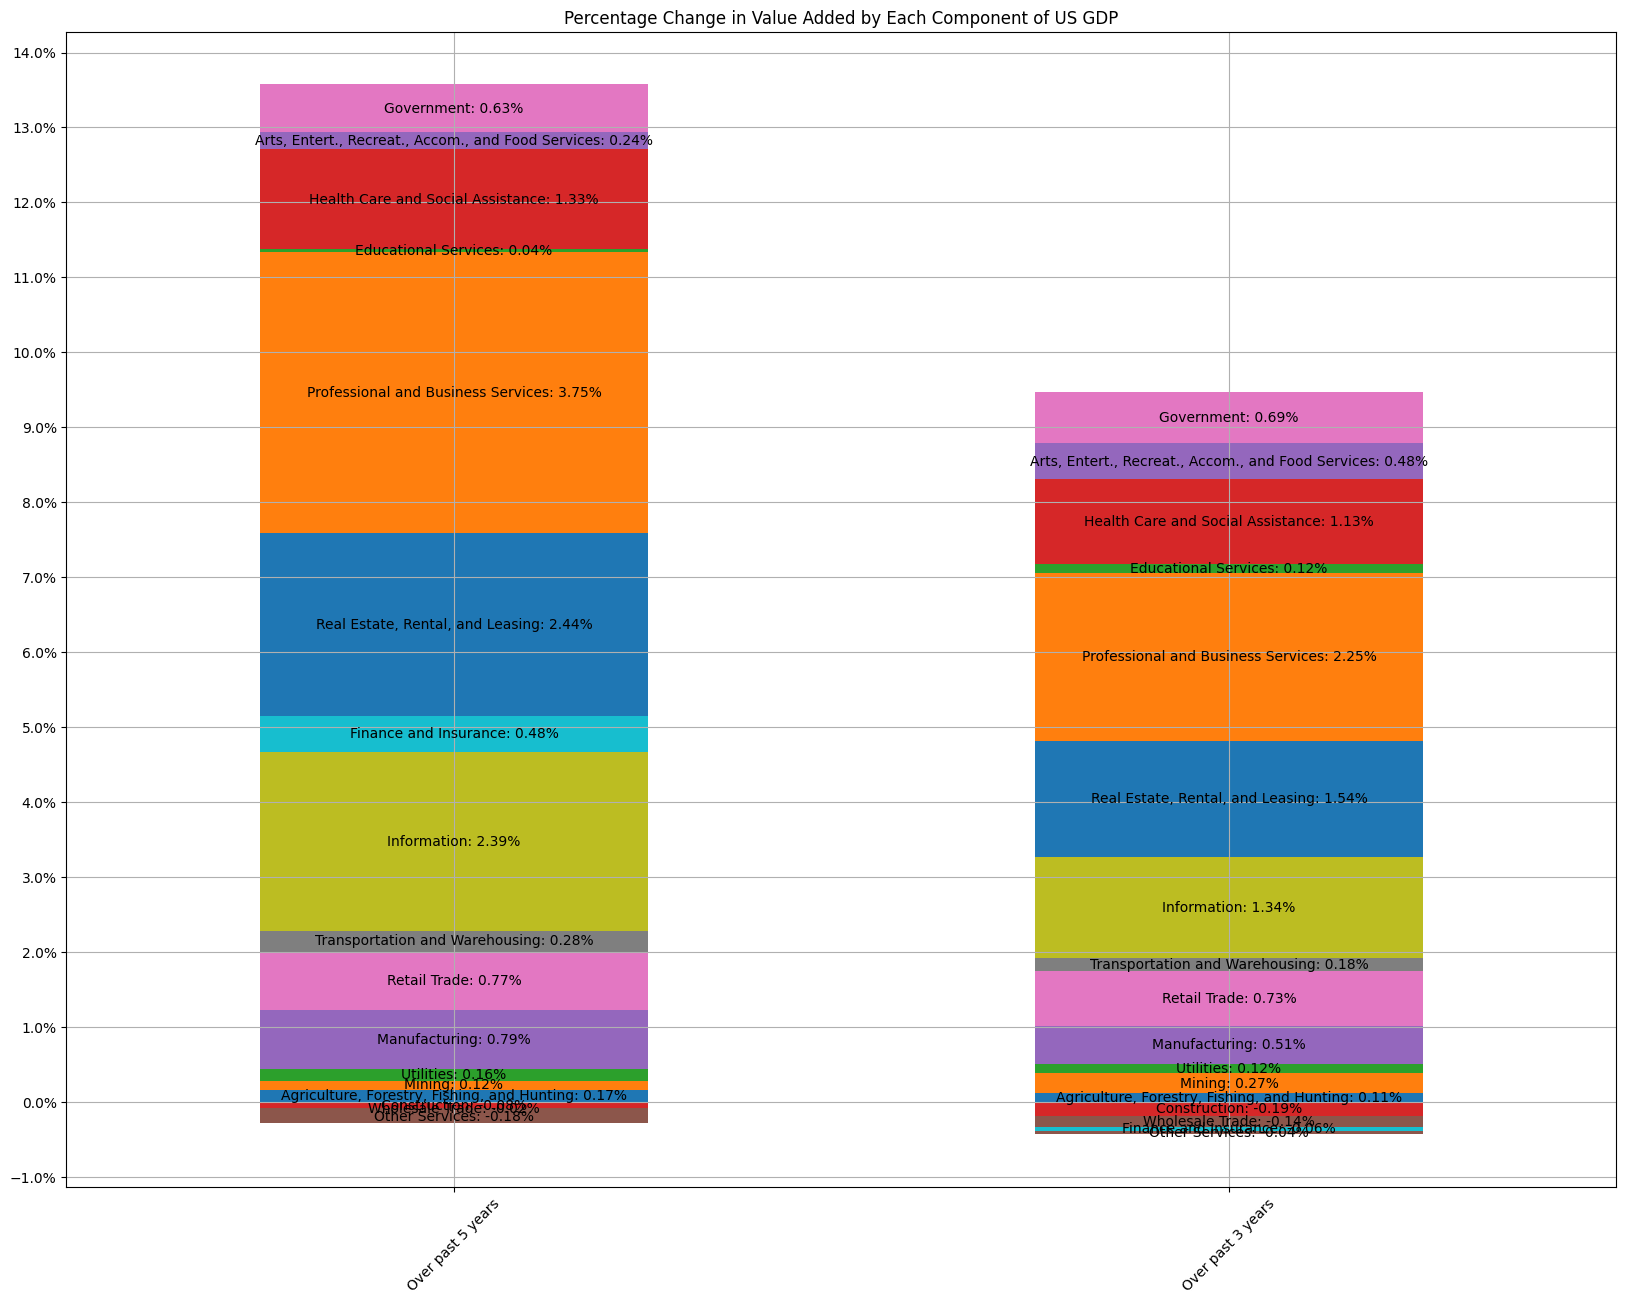

In [18]:
y_max = round(max([series[series.iloc[:] > 0].sum() for _, series in gdp_components_pct_chg.items()]) + .005, 2) + 1e-3
ax = gdp_components_pct_chg.T.plot.bar(figsize=(20,15), grid=True, title=GRAPH_TITLE_GDP_COMPONENTS_PCT_CHG,
                                       stacked=True, rot=45, yticks=np.arange(-.01, y_max, .01))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.get_legend().remove()
for c in ax.containers:
    ax.bar_label(c, fmt=c.get_label() + ': {:.2%}', label_type='center')

**Conclusion 2**: The largest growing industries, as measured by their real value added contributon to the overall GDP growth, are:
* Professional and Business Services
* Information
* Real Estate, Rental, and Leasing
* Health Care and Social Assistance
* Manufacturing

Of these industries:
* Professional and Business Services
* Real Estate, Rental, and Leasing
* Manufacturing
* Health Care and Social Assistance

are also in the Top-5 biggest contributoes to the US GDP (see Conclusion 1 above).

Due to the presence of GDP components that are not allocated to any industry group and rounding errors, a perfect match is not possible... Still a difference should not be bigger than 5%.

In [19]:
assert np.allclose(gdp_components_pct_chg.sum(), gdp_total_pct_chg.squeeze(), rtol=0.06)

Let's compare the top-5 growing industries over the past 3 and 5 years.

In [20]:
gdp_components_pct_chg.sort_values(by=gdp_components_pct_chg.columns[0], ascending=False).iloc[:5,:1]

,Over past 5 years
Professional and Business Services,3.75%
"Real Estate, Rental, and Leasing",2.44%
Information,2.39%
Health Care and Social Assistance,1.33%
Manufacturing,0.79%


In [21]:
gdp_components_pct_chg.sort_values(by=gdp_components_pct_chg.columns[1], ascending=False).iloc[:5,1:]

,Over past 3 years
Professional and Business Services,2.25%
"Real Estate, Rental, and Leasing",1.54%
Information,1.34%
Health Care and Social Assistance,1.13%
Retail Trade,0.73%


**Conclusion 3**: Over the past 3 years the `Retail Trade` industry group supplanted `Manufacturing` in the list of the top-5 largest contributors to US GDP growth.

#### Quick look at industries that are contracting

In [22]:
contracting_5y = gdp_components_pct_chg.sort_values(by=gdp_components_pct_chg.columns[0]).iloc[:, :1]
contracting_5y = contracting_5y.loc[contracting_5y.iloc[:,0] < 0]
contracting_3y = gdp_components_pct_chg.sort_values(by=gdp_components_pct_chg.columns[1]).iloc[:, 1:]
contracting_3y = contracting_3y.loc[contracting_3y.iloc[:,0] < 0]

In [23]:
contracting_5y

,Over past 5 years
Other Services,-0.18%
Construction,-0.08%
Wholesale Trade,-0.02%


In [24]:
contracting_3y

,Over past 3 years
Construction,-0.19%
Wholesale Trade,-0.14%
Finance and Insurance,-0.06%
Other Services,-0.04%
